# <center>UDACITY PROJECT 2 : REVIEWING A DATASET<center>

## Introduction

### Overview

**To complete the second project I used TMDb Movies Dataset.
This dataset contains info about 10 thousand movies collectied from The Movie Database(TMDb),including user ratings and revenue.It consists of 21 columns such as imdb_id,revenue,budget,vote_count and so on.**


### Question that can analyised from this data set

* Top 5 year in which maximum number of movie was released.
* Yearwise Average Ratings of the Movies
* Yearwise Movies Directed By Director(Top 5)
* Averge Movie Run Time
* Average Profit Yearly(Most Profitable Year)

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [146]:
#Load the dataset
data = pd.read_csv("tmdb-movies.csv")

In [147]:
data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


## General Properties

In [148]:
#Number of Rows in the Dataset
print("The Number of Rows in the dataset is   : ", data.shape[0])

The Number of Rows in the dataset is   :  10866


In [149]:
#Number of Columns in the Dataset
print("The Number of Columns in the dataset is   : ", data.shape[1])

The Number of Columns in the dataset is   :  21


In [150]:
#Information about the datatypes
data.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [151]:
#Description of the data
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [152]:
data.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


## Data Cleaning

### Removing the Unwanted Columns from the dataset
**Here we are removing the id ,imdb_id,homepage,tagline,keywords,overview,release_date,vote_count from the dataset**


In [153]:
columns = ['id' ,'imdb_id','homepage','tagline','keywords','overview','release_date','vote_count']
print("Number of columns before dropping the undesired columns : ",data.shape[1])
data.drop(columns,axis=1,inplace=True)
print("Number of columns after dropping the undesired columns : ",data.shape[1])

Number of columns before dropping the undesired columns :  21
Number of columns after dropping the undesired columns :  13


In [154]:
data.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09


In [155]:
#Check for the number of missing values in rows
data.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**The column production_companies are having maximum number of missing records i.e; 1030 rows.**

## Research Question 1: Top 5  year in which maximum number of movie was released.

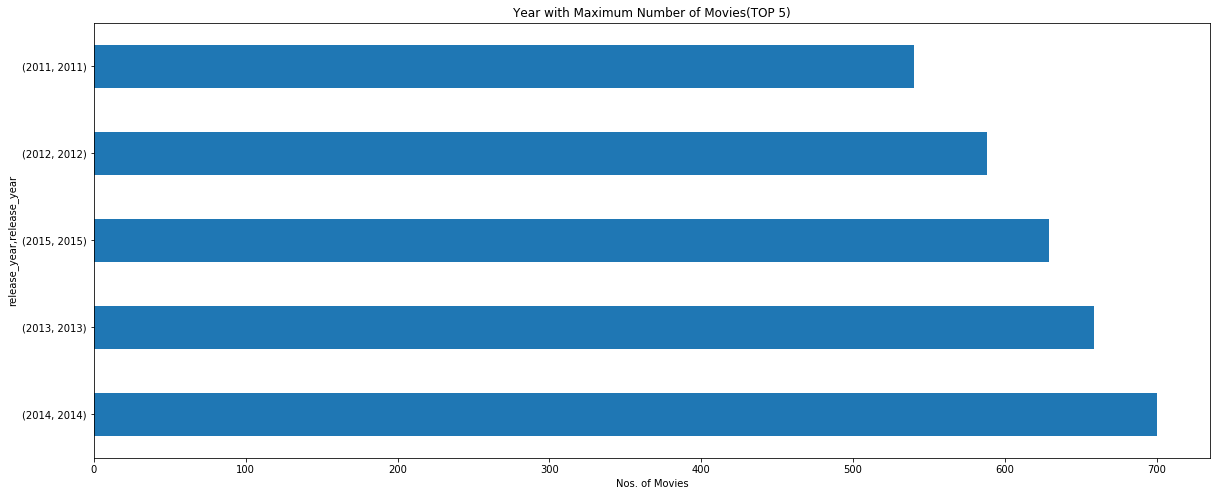

In [156]:
plt.figure(figsize=(20,8))
plt.title("Year with Maximum Number of Movies(TOP 5)")
plt.xlabel("Nos. of Movies")
plt.ylabel("Year")
data.groupby('release_year')['release_year'].value_counts().sort_values(ascending=False).head().plot.barh()

**So from the Above Plots we can see that in the year 2014 Maximum Number of Movie was release which is around 700 movies.**

## Research Question 2: Yearwise Average Ratings

In [157]:
data_plot = data.groupby('release_year')['vote_average'].mean()
data_plot

release_year
1960    6.325000
1961    6.374194
1962    6.343750
1963    6.329412
1964    6.211905
1965    6.194286
1966    6.128261
1967    6.242500
1968    6.379487
1969    5.961290
1970    6.417073
1971    6.420000
1972    6.535000
1973    6.703636
1974    6.395745
1975    6.390909
1976    6.340426
1977    6.147368
1978    6.130769
1979    6.308772
1980    6.160256
1981    6.165854
1982    6.241975
1983    5.971250
1984    6.003810
1985    6.177064
1986    6.004959
1987    6.128800
1988    5.965517
1989    6.070073
1990    5.993939
1991    6.014286
1992    6.081203
1993    6.050000
1994    5.942391
1995    6.056000
1996    5.900980
1997    5.988542
1998    5.970476
1999    6.032589
2000    5.882379
2001    5.896281
2002    5.973308
2003    5.930961
2004    5.988599
2005    5.866484
2006    5.941422
2007    5.964384
2008    5.930847
2009    5.856660
2010    5.990816
2011    5.958519
2012    5.799830
2013    5.880577
2014    5.920714
2015    5.885692
Name: vote_average, dtype: float64

Text(0, 0.5, 'Average Ratings')

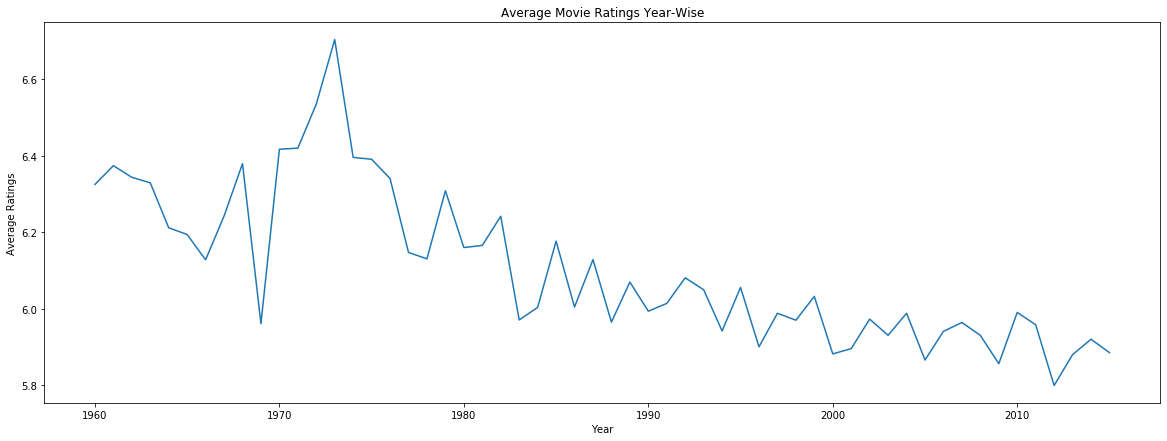

In [158]:
plt.figure(figsize=(20,7))
data_plot.plot()
plt.title("Average Movie Ratings Year-Wise")
plt.xlabel("Year")
plt.ylabel("Average Ratings")

## Research Question 3: Yearwise Movies Directed By Director(Top 5)


Text(0.5, 0, 'Total Movies Directed(In Percent) Top 5')

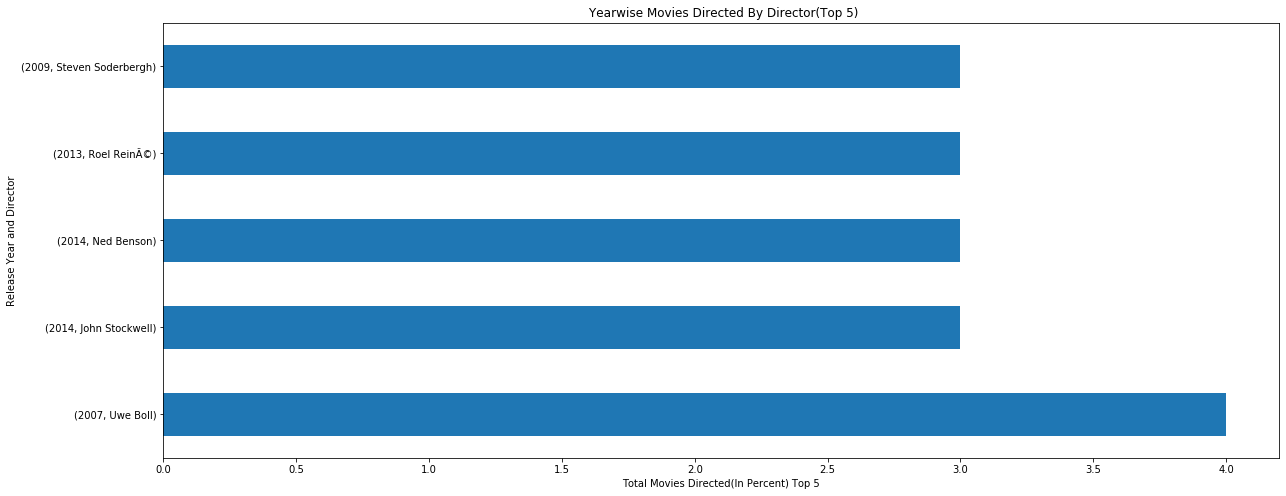

In [160]:
plt.figure(figsize=(20,8))
data.groupby('release_year')['director'].value_counts().sort_values(ascending=False).head().plot.barh()
plt.title(" Yearwise Movies Directed By Director(Top 5)")
plt.ylabel("Release Year and Director")
plt.xlabel("Total Movies Directed(In Percent) Top 5")

**In the above plots we can see that in the year 2007 most of the movies was directed by Uwe Boll while most of the movies released in year 2009 was directed by Steven Soderbergh.**

## Research Question 4:- Averge Movie Run Time

In [161]:
# defining a function to find average of a column
def calulate_column_average(column):
    return data[column].mean()

res = calulate_column_average('runtime')
print("The Average Movie Runtime was(in minutes) : ", res)

The Average Movie Runtime was(in minutes) :  102.07086324314375


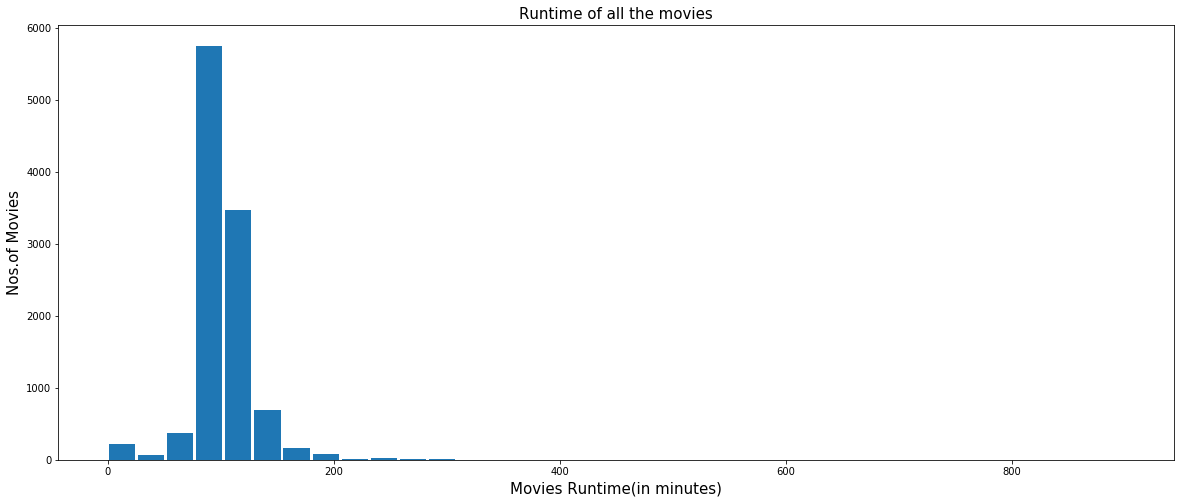

In [162]:
#plotting a histogram of runtime of movies

plt.figure(figsize=(20,8) )
plt.xlabel('Movies Runtime(in minutes)', fontsize = 15) 
plt.ylabel('Nos.of Movies', fontsize=15)
plt.title('Runtime of all the movies', fontsize=15)
plt.hist(data['runtime'], rwidth = 0.9, bins =35)
plt.show()

In [163]:
data['profit'] = data['revenue'] - data['budget']

In [164]:
data.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08,228436354


## Research Question 5: Yearly Average Profit

In [165]:
#Yearly Average Profit
data_plot = data.groupby('release_year')['profit'].mean()
data_plot


release_year
1960    3.842127e+06
1961    9.405909e+06
1962    5.026804e+06
1963    3.355103e+06
1964    7.178539e+06
1965    1.108219e+07
1966    5.909106e+05
1967    1.592956e+07
1968    4.943435e+06
1969    6.510580e+06
1970    1.056720e+07
1971    5.980247e+06
1972    1.146127e+07
1973    2.106891e+07
1974    1.565042e+07
1975    2.048207e+07
1976    1.444374e+07
1977    3.542111e+07
1978    1.785819e+07
1979    2.508738e+07
1980    1.802772e+07
1981    1.708352e+07
1982    2.494628e+07
1983    2.235527e+07
1984    1.815536e+07
1985    1.951424e+07
1986    1.899376e+07
1987    2.202119e+07
1988    1.940830e+07
1989    2.981947e+07
1990    3.049428e+07
1991    2.436366e+07
1992    3.486006e+07
1993    2.907597e+07
1994    2.644686e+07
1995    3.594547e+07
1996    2.266887e+07
1997    3.075045e+07
1998    2.377864e+07
1999    2.495749e+07
2000    2.302203e+07
2001    3.209975e+07
2002    3.289090e+07
2003    3.166685e+07
2004    3.134685e+07
2005    2.520206e+07
2006    2.198420e+07


Text(0, 0.5, 'Average Profit Earned')

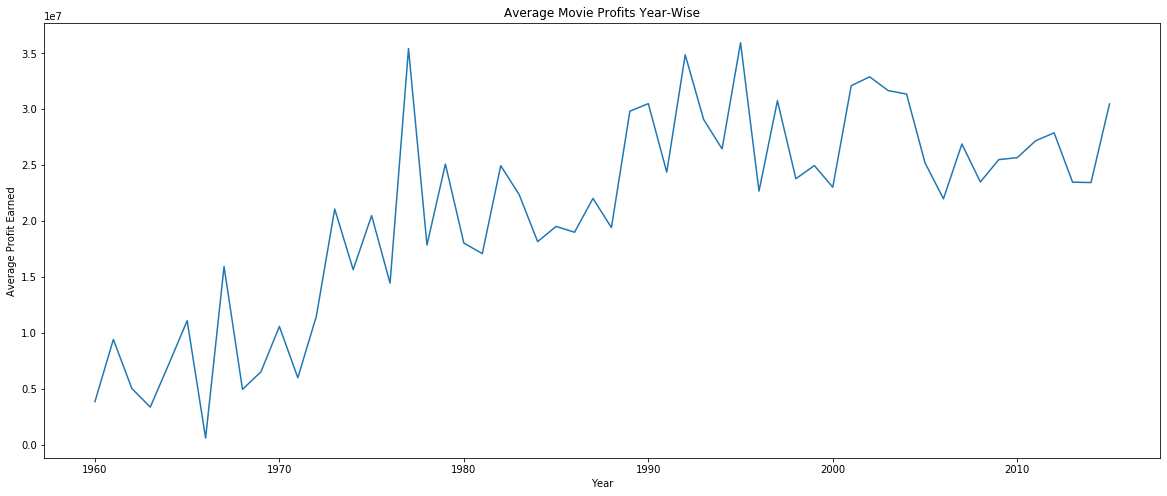

In [166]:
plt.figure(figsize=(20,8))
data_plot.plot()
plt.title("Average Movie Profits Year-Wise")
plt.xlabel("Year")
plt.ylabel("Average Profit Earned")

**So from the above graph we can see that the most profitable year was around 1995 where the average profit as compared to the investment(budget) was maximum.(By keeping the conversion rates aside)**

# Conclusion

* <b>Year 2014 was the year in which the most number of movie was released.<b>

* <b>The average rating of the movie was around 5.8 to 6.9 across all the available data across the years.<b>

* <b>In the year 200 most of the movies released was directed by Uwe Boll.<b>

* <b>Average Movie Runtime was around 102 minutes.<b>

## Limitations
* In the project the number of votes considered for deciding the rating is inconsistent which creates a problem for getting the accurate ratings of the movies.
* The ratings given by the user is always biased. Some may like the movie of specific genres so they will give that movie a good rating and same is the case with bad ratings in case of likeness of genres or cast.

**<center>Submitted By Avinash, Date :-22/03/2020 <center>**